# Feature Engineering - II

* Quick recap of classification metrics
* Use of AUC and ROC
* Use of a pipeline object
* The Train, Validation and Test sets
* Hyperparameter tuning – GridSearchCV and RandomSearchCV
* Case Study


# Classification Metrics:

* Confusion Metrics
* Classification Rate/Accuracy
* Recall
* Precession
* F1 Score/F-measure

**Confusion Matrix**

* A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
* The number of correct and incorrect predictions are summarized with count values and broken down by each class.
* It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [1]:
from IPython.display import Image

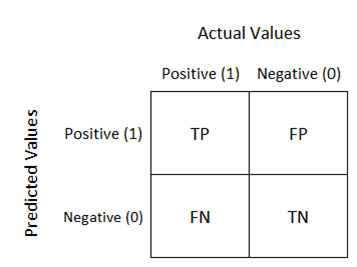

In [2]:
Image(filename = 'cm.png', width=300)

**Definition of the Terms:**
* Positive (P) : Observation is positive (for example: is an apple).
* Negative (N) : Observation is not positive (for example: is not an apple).
* True Positive (TP) : Observation is positive, and is predicted to be positive.
* False Negative (FN) : Observation is positive, but is predicted negative.
* True Negative (TN) : Observation is negative, and is predicted to be negative.
* False Positive (FP) : Observation is negative, but is predicted positive.


**Classification Rate/Accuracy:**
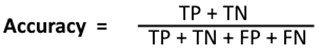
However, there are problems with accuracy. It assumes equal costs for both kinds of errors

**Recall:**
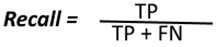    
* Recall gives us an idea about when it’s actually yes, how often does it predict yes.
* High Recall indicates the class is correctly recognized (a small number of FN).



**Precession:**
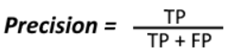
* Precession tells us about when it predicts yes, how often is it correct.
* High Precision indicates that FP is less, so better prediction. 



**High recall, low precision:** This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

**Low recall, high precision:** This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)


* **A single metric is not sufficient for the evaluation of classification models.** 
* **We have seen that we need to use recall and precision together along with accuracy to evaluate our model.**
* **Let us consider another metric that puts together the recall and precision metrics. We call it F1 Score.**

**F1 Score/F-measure:**
It is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

* It is given by **2(precision*recall)/(precision + recall)**


*  F1 score - F1 Score is the weighted average of Precision and Recall. 
* Therefore, this score takes both false positives and false negatives into account. 
* F1 is usually more useful than accuracy, especially if you have an **uneven class distribution.**

In [3]:
# **Code for printing all these classification metrics:**
from sklearn import metrics
# print('accuracy:', y_test,y_pred)
# print(metrics.confusion_matrix(y_test, y_predict))
# print(metrics.classification_report(y_test, y_predict)) - Recall, Precesion, F1score
    

# ROC and AUC

**ROC - Receiver Operating Characteristics**

* It is a probability curve with True positive rate in the vertical axis and False positive rate on the horizontal axis for different threshold values.
* It is a graphical plot used to show the diagnostic ability of binary classifiers.
* The ROC curves are useful to visualize and compare the performance of classifier methods.

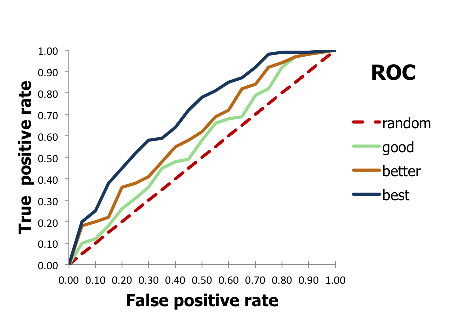

In [4]:
Image(filename = 'roc.png', width = 500)

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr)

**AUC is the area under the ROC curve**


In [6]:
# auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

# Pipeline

* Pipelines are set up with the **fit/transform/predict** functionality, so that we can fit the whole pipeline to the training data and transform to the test data without having to do it individually for everything you do.
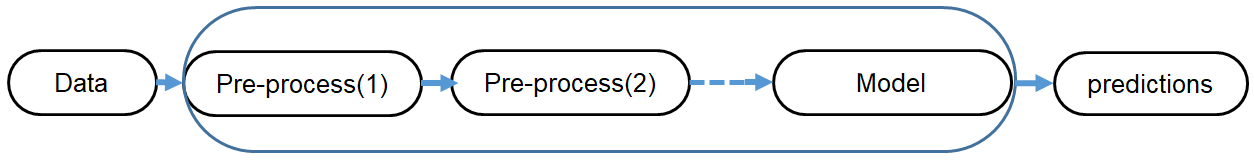

* Pipeline is normally used when we need to chain functions together.
* It can be easily done with the help of Pandas series function
* It is similar to grouping to functions together

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame()    # Create a dataframe

In [9]:
df['name'] = ['abi', 'veda', 'kaushik']
df['loan'] = ['yes', 'no', 'yes']
df['age'] = [26, 20, 30]
df

,name,loan,age
0,abi,yes,26
1,veda,no,20
2,kaushik,yes,30


In [10]:
#Create function1
def mean_age_group(dataframe, col):
    #return the data by a column and return the mean age per group
    return dataframe.groupby(col).mean()

In [11]:
#Create function2
def upper_column_name(dataframe):
    dataframe.columns = dataframe.columns.str.upper()
    return dataframe

In [12]:
#Create a pipeline that combines both the functions
(df.pipe(mean_age_group, col = 'loan')
    # then apply the upper case function
    .pipe(upper_column_name))

,AGE
loan,
no,20
yes,28


# Train, Validation and Test Sets

* The given dataset should be divided into three datasets:
* Normally it will be Train, Validation and Test.
* But depends on the dataset, that is if the dataset is small then we normally prefer to classif as Train and Test 

**The common ratios used are:**
   * 70% train, 15% val, 15% test
   * 80% train, 10% val, 10% test
   * 60% train, 20% val, 20% test

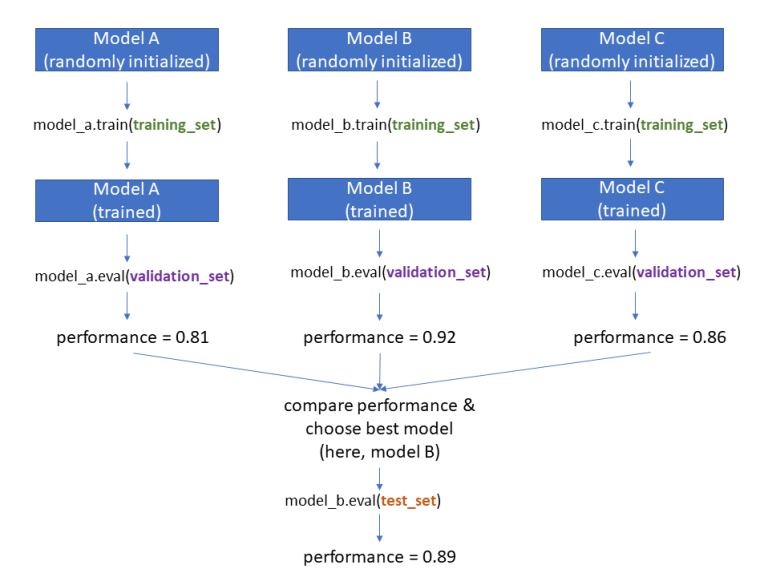

In [13]:
# Example split for the different ratios in Train, Validation and Split
Image(filename = 'split.png', width =600)

In [14]:
from sklearn.model_selection import train_test_split

# Train & Test Split alone
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train further divided into Validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Crossvalidation

* Cross Validation is used to assess the predictive performance of the models and to judge how they perform outside the sample to a new data set also known as test data.
* The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. 
* Without cross validation we only have information on how does our model perform to our in-sample data. 
* Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions.

* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 

 **The most commonly used method is K-fold crossvalidation type**

K-Fold is a popular and easy to understand, it generally results in a less biased model compare to other methods.

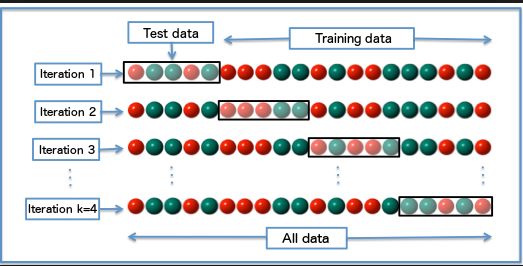

**This method follows the below steps.**
* Split the entire data randomly into k folds (value of k shouldn’t be too small or too high, ideally we choose 5 to 10 depending on the data size). The higher value of K leads to less biased model (but large variance might lead to overfit), where as the lower value of K is similar to the train-test split approach we saw before.
* Then fit the model using the K — 1 (K minus 1) folds and validate the model using the remaining Kth fold. Note down the scores/errors.
* Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model.

**We can write a logic manually to perform this or we can use the built in cross_val_score (returns score of each test folds)/corss_val_predict (returns the predicted score for each observation in the input dataset when it was part of the test set) from the scikit_learn library.**

* If the esitmator (model) is a claissifier and ‘y’(target variable) is either binary/multicalss, then ‘StratifiedKfold’ technique is used by default. 
* In all other cases ‘K_Fold’ technique is used as a default to split and train the model.

In [15]:
# cv_r2_scores = cross_val_score(model.fit, X, y, cv=5 or 10)
# print(cv_r2_scores)
# print('Mean of k-fold R Squared: {}'.format(np.mean(cv_r2_scores)))

**Note: Similar to K_Fold cross-validator, StratifiedKfold returns stratified folds, i.e while making the folds it maintains the percentage of samples for each class in every fold. So that model gets equally distributed data for training/test folds.**

In [16]:
#from sklearn.model_selection import KFold 
#kf = KFold(n_splits=5, n_repeats=10, random_state=None) 

#for train_index, test_index in kf.split(X):
#      print("Train:", train_index, "Validation:",test_index)
#      X_train, X_test = X[train_index], X[test_index] 
#      y_train, y_test = y[train_index], y[test_index]

**Stratified K-Fold**

In [17]:
#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
#for train_index, test_index in skf.split(X,y): 
#    print("Train:", train_index, "Validation:", val_index) 
#    X_train, X_test = X[train_index], X[val_index] 
#    y_train, y_test = y[train_index], y[val_index]

**Having said that, if the train set does not adequately represent the entire population, then using a stratified k-fold might not be the best idea. In such cases, one should use a simple k-fold cross validation with repetition.**

**In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.**

**Repeated KFold**

In [18]:
#from sklearn.model_selection import RepeatedKFold
#rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
#for train_index, test_index in rkf.split(X):
#     print("Train:", train_index, "Validation:", val_index)
#     X_train, X_test = X[train_index], X[val_index]
#     y_train, y_test = y[train_index], y[val_index]

# Hyperparameter tuning – GridSearchCV and RandomSearchCV

* Hyperparameters are the one that are set by the data scientist to make the model perform better in testing phase.
* Hyperparameters can be thought of as model settings.

Example:
The weights learned during training of a linear regression model are parameters while the number of trees in a random forest is a model hyperparameter because this is set by the data scientist. 

**There are several approaches to hyperparameter tuning**
* Manual
* Grid Search
* Random Search
* Automated Hyper parameter tuning

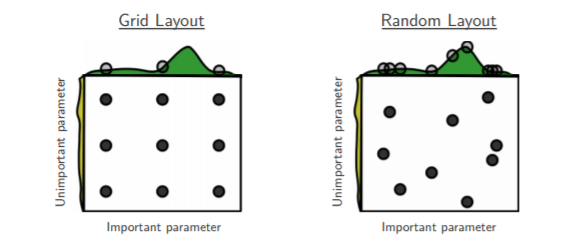

**What is grid search?**

* Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

**Why should I use it?**
* In Machine Learning it is not easy to tune the hyper parameters manually.
* So there are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process 
* It is also possible and recommended to search the hyper-parameter space for the best cross validation score.

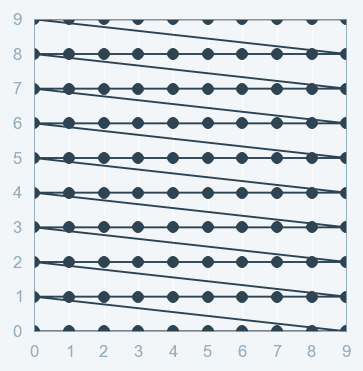

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# gsc = GridSearchCV(
#        estimator=SVR(kernel='rbf'),
#        param_grid={
#            'C': [0.1, 1, 100, 1000],
#            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5], 'kernel': ['rbf','linear','sigmoid','poly'],
#            'alpha': [1,0.1,0.01,0.001,0.0001,0]
#        },
#        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
# grid_result = gsc.fit(X, y)
# best_params = grid_result.best_params_
# best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"], 
#               alpha=best_prams["alpha"])

**Gamma:**

* Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
* if ‘auto’, uses 1 / n_features.


**C:**
* Regularization parameter. 
* The strength of the regularization is inversely proportional to C. 
* Must be strictly positive. 

**epsilon:**
* Epsilon in the epsilon-SVR model. 
* It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

**Disadvantage:** In this approach, every single combination of hyperparameters values is tried which can be very inefficient!

**Random Search**

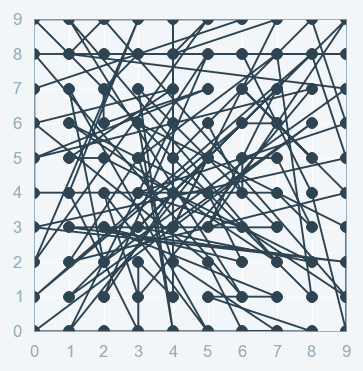

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVR
# gsc = RandomizedSearchCV(
#        estimator=SVR(kernel='rbf'),
#        param_grid={
#            'C': [0.1, 1, 100, 1000],
#            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5], 'kernel': ['rbf','linear','sigmoid','poly'],
#            'alpha': [1,0.1,0.01,0.001,0.0001,0]
#        },
#        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
# grid_result = gsc.fit(X, y)
# best_params = grid_result.best_params_
# best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"], 
#               alpha=best_prams["alpha"])